In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Input
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras import optimizers
import tensorflow as tf
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
import scipy.stats as stats
from keras.layers import Bidirectional
from wordcloud import WordCloud
import re
from wordcloud import STOPWORDS
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk import ngrams
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from textblob import TextBlob
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
stock='/content/drive/MyDrive/Colab Notebooks/Brent.csv'
nlp='/content/drive/MyDrive/Colab Notebooks/train_oil.csv'
nlp2='/content/drive/MyDrive/Colab Notebooks/valid_data.csv'
data=pd.read_csv(stock)
news=pd.read_csv(nlp)
news2=pd.read_csv(nlp2)

In [ ]:
data.shape

(4861, 7)

In [ ]:
news.shape

(16990, 2)

In [ ]:
data.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        4
Change %    0
dtype: int64

In [ ]:
news.isnull().sum()

text     0
label    0
dtype: int64

In [ ]:
data.head(4861)

,Date,Price,Open,High,Low,Vol.,Change %
0,05/01/2004,30.89,29.65,31.00,29.65,50.06K,5.35%
1,06/01/2004,30.82,30.72,31.40,30.55,52.35K,-0.23%
2,07/01/2004,30.76,30.64,30.97,30.25,45.10K,-0.19%
3,08/01/2004,31.08,30.72,31.24,30.55,39.20K,1.04%
4,09/01/2004,31.37,31.29,31.80,31.29,36.39K,0.93%
...,...,...,...,...,...,...,...
4856,07/11/2022,97.92,97.31,99.56,96.50,241.94K,-0.66%
4857,08/11/2022,95.36,98.24,98.30,95.00,251.67K,-2.61%
4858,09/11/2022,92.65,95.17,95.65,92.33,308.02K,-2.84%
4859,10/11/2022,93.67,92.53,94.32,91.73,278.53K,1.10%


In [ ]:
news.head(1)

,text,label
0,Here are Thursday's biggest analyst calls: App...,0


In [ ]:
news2.head(1)

,text,label
0,Analyst call of the day for @CNBCPro subscribe...,0


In [ ]:
print(news['label'])

0        0
1        0
2        0
3        0
4        0
        ..
16985    3
16986    3
16987    3
16988    3
16989    3
Name: label, Length: 16990, dtype: int64


In [ ]:
print(news2['label'])

0       0
1       0
2       0
3       0
4       0
       ..
4112    3
4113    3
4114    3
4115    3
4116    3
Name: label, Length: 4117, dtype: int64


In [ ]:
news=news.loc[(news['label'] == 6) | (news['label'] == 10) | (news['label'] == 13) | (news['label'] == 15) | (news['label'] == 16) | (news['label'] == 18)]
print(news)

                                                    text  label
5317   JUST RELEASED: Oil Price Dynamics Report → Ove...      6
5318   BREAKING: Russia reportedly starts sending gas...      6
5319   Former Deputy Secretary of Defense John Negrop...      6
5320   Former US Ambassador to NATO Kurt Volker: “Exp...      6
5321   Goldman Sachs Head of Energy Research Damien C...      6
...                                                  ...    ...
15841  Short-seller Muddy Waters takes short position...     18
15842  The impact of an economic slowdown could offse...     18
15843  Twitter Shares Still Reflect Hope Deal With Mu...     18
15844  Alibaba led a drop in Chinese tech shares afte...     18
15845  French power group EDF requests its shares be ...     18

[4668 rows x 2 columns]


In [ ]:
news2=news2.loc[(news2['label'] == 6) | (news2['label'] == 10) | (news2['label'] == 13) | (news2['label'] == 15) | (news2['label'] == 16) | (news2['label'] == 18)]
print(news2)

                                                   text  label
1298  “I’m doing all I can to increase the supply." ...      6
1299  This play on an oil price surge offers investo...      6
1300  Russia nears gas shutdown in Europe as Germany...      6
1301  $COMDX: Energy Settlement Prices  https://t.co...      6
1302  #Energy futures pull back some $XLE $CL_F $TNX...      6
...                                                 ...    ...
3838               @ali__pmp still in downtrend overall     18
3839  WEEKLY $SPY CHART   20 (R), 30 (B), 40 (G) wee...     18
3840                         @SPYJared @BMW in what? :)     18
3841  $UNCY Key findings from the research: •Nephrol...     18
3842  From @Breakingviews: GSK’s discounted valuatio...     18

[1177 rows x 2 columns]


In [ ]:
news.head(1)

,text,label
0,Here are Thursday's biggest analyst calls: App...,0


In [ ]:
def gen_freq(text):
  word_list=[]

  for words in text.split():
    word_list.extend(words)

  word_freq=pd.Series(word_list).value_counts()
  word_freq[:20]

  return word_freq

gen_freq(news.text.str)

the                        7554
to                         7391
of                         5453
-                          4646
a                          4292
                           ... 
dampens                       1
https://t.co/JCQuG5Rg1G       1
https://t.co/3PF3nLopIA       1
‘inflection                   1
https://t.co/hCKnxYi8AA       1
Length: 62612, dtype: int64

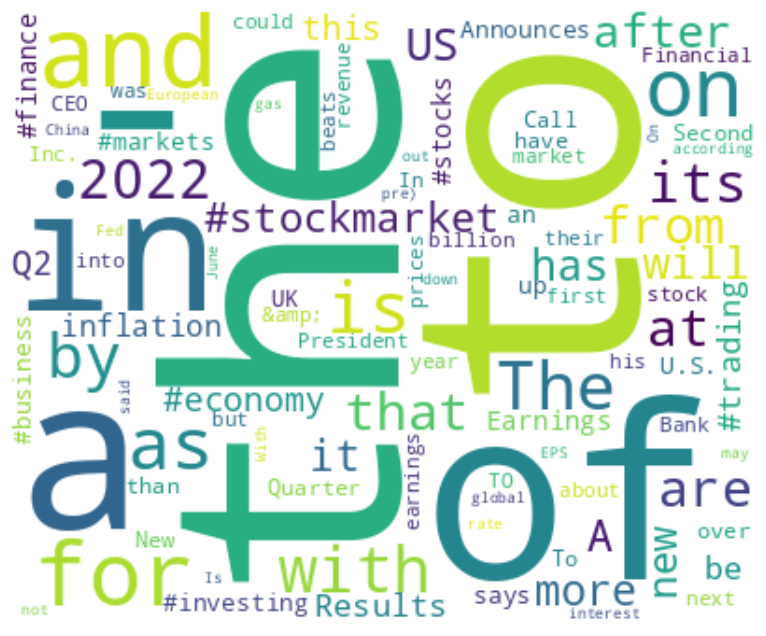

In [ ]:
word_freq=gen_freq(news.text.str)
w=WordCloud(width=400, height=330, max_words=100, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(12,8))
plt.imshow(w, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
def clean_text(text):
    text=re.sub(r'RT', '', text)
    text = re.sub(r'&amp;', '&', text)

    text = re.sub(r'[?!.;:,#@-]', '', text)

    text = text.lower()
    return text

In [ ]:
news['clean_text'] = news.text.apply(lambda x: clean_text(x))
news

,text,label,clean_text
0,Here are Thursday's biggest analyst calls: App...,0,here are thursday's biggest analyst calls appl...
1,Buy Las Vegas Sands as travel to Singapore bui...,0,buy las vegas sands as travel to singapore bui...
2,"Piper Sandler downgrades DocuSign to sell, cit...",0,piper sandler downgrades docusign to sell citi...
3,"Analysts react to Tesla's latest earnings, bre...",0,analysts react to tesla's latest earnings brea...
4,Netflix and its peers are set for a ‘return to...,0,netflix and its peers are set for a ‘return to...
...,...,...,...
16985,KfW credit line for Uniper could be raised to ...,3,kfw credit line for uniper could be raised to ...
16986,KfW credit line for Uniper could be raised to ...,3,kfw credit line for uniper could be raised to ...
16987,Russian https://t.co/R0iPhyo5p7 sells 1 bln r...,3,russian https//tco/r0iphyo5p7 sells 1 bln rou...
16988,Global ESG bond issuance posts H1 dip as supra...,3,global esg bond issuance posts h1 dip as supra...


In [ ]:
news2['clean_text'] = news2.text.apply(lambda x: clean_text(x))
news2

,text,label,clean_text
1298,"“I’m doing all I can to increase the supply."" ...",6,"“i’m doing all i can to increase the supply"" ..."
1299,This play on an oil price surge offers investo...,6,this play on an oil price surge offers investo...
1300,Russia nears gas shutdown in Europe as Germany...,6,russia nears gas shutdown in europe as germany...
1301,$COMDX: Energy Settlement Prices https://t.co...,6,$comdx energy settlement prices https//tco/px...
1302,#Energy futures pull back some $XLE $CL_F $TNX...,6,energy futures pull back some $xle $cl_f $tnx ...
...,...,...,...
3838,@ali__pmp still in downtrend overall,18,ali__pmp still in downtrend overall
3839,"WEEKLY $SPY CHART 20 (R), 30 (B), 40 (G) wee...",18,weekly $spy cha 20 (r) 30 (b) 40 (g) week ma...
3840,@SPYJared @BMW in what? :),18,spyjared bmw in what )
3841,$UNCY Key findings from the research: •Nephrol...,18,$uncy key findings from the research •nephrolo...


In [ ]:
print(STOPWORDS)

{'them', 'ourselves', "can't", 'she', "there's", 'for', 'k', 'your', "he's", "when's", "he'd", 'all', "that's", 'at', "he'll", "they'll", 'were', 'had', "who's", 'do', 'any', "don't", 'hence', 'also', 'few', "she's", 'was', 'whom', "you've", 'else', 'myself', 'can', 'of', 'why', 'did', 'what', 'our', 'and', 'him', 'a', 'does', 'against', "it's", 'themselves', "shan't", 'when', 'ever', "haven't", "couldn't", 'have', 'yourself', 'yourselves', "we're", 'how', 'with', 'has', 'theirs', 'over', 'once', 'shall', "how's", 'been', "let's", "she'd", 'again', 'com', 'since', 'itself', "i've", 'while', "they've", 'this', "doesn't", 'such', 'or', 'because', "they'd", 'herself', 'are', "mustn't", "isn't", "she'll", "we'll", 'only', 'get', 'her', 'himself', "where's", 'would', 'until', "shouldn't", "won't", 'on', 'than', "we've", 'the', 'just', 'their', 'about', 'other', 'an', 'own', 'up', 'more', 'by', 'be', "wasn't", 'who', 'if', 'it', 'before', 'below', 'some', 'therefore', 'each', 'his', 'so', 'd

In [ ]:
news1 = news.text.apply(lambda x: clean_text(x))
word_freq = gen_freq(news1.str)*100
word_freq = word_freq.drop(labels=STOPWORDS, errors='ignore')

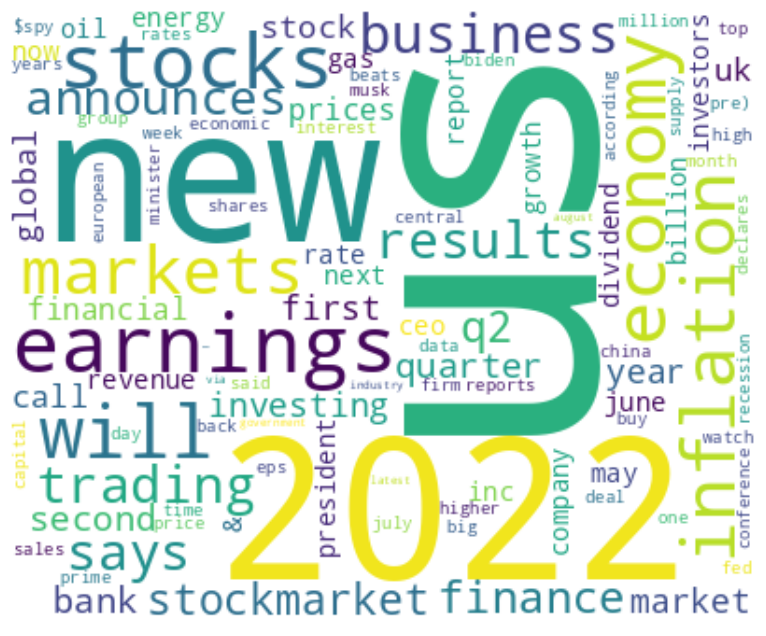

In [ ]:
w=WordCloud(width=400, height=330, max_words=100, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(12,8))
plt.imshow(w, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
news[:]

,text,label,clean_text
0,Here are Thursday's biggest analyst calls: App...,0,here are thursday's biggest analyst calls appl...
1,Buy Las Vegas Sands as travel to Singapore bui...,0,buy las vegas sands as travel to singapore bui...
2,"Piper Sandler downgrades DocuSign to sell, cit...",0,piper sandler downgrades docusign to sell citi...
3,"Analysts react to Tesla's latest earnings, bre...",0,analysts react to tesla's latest earnings brea...
4,Netflix and its peers are set for a ‘return to...,0,netflix and its peers are set for a ‘return to...
...,...,...,...
16985,KfW credit line for Uniper could be raised to ...,3,kfw credit line for uniper could be raised to ...
16986,KfW credit line for Uniper could be raised to ...,3,kfw credit line for uniper could be raised to ...
16987,Russian https://t.co/R0iPhyo5p7 sells 1 bln r...,3,russian https//tco/r0iphyo5p7 sells 1 bln rou...
16988,Global ESG bond issuance posts H1 dip as supra...,3,global esg bond issuance posts h1 dip as supra...


In [ ]:
analyzer = SentimentIntensityAnalyzer()
news['polarity'] = news['clean_text'].apply(lambda x: analyzer.polarity_scores(x))
news.tail(3)

,text,label,clean_text,polarity
16987,Russian https://t.co/R0iPhyo5p7 sells 1 bln r...,3,russian https//tco/r0iphyo5p7 sells 1 bln rou...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
16988,Global ESG bond issuance posts H1 dip as supra...,3,global esg bond issuance posts h1 dip as supra...,"{'neg': 0.149, 'neu': 0.851, 'pos': 0.0, 'comp..."
16989,Brazil's Petrobras says it signed a $1.25 bill...,3,brazil's petrobras says it signed a $125 billi...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [ ]:
analyzer = SentimentIntensityAnalyzer()
news2['polarity'] = news2['clean_text'].apply(lambda x: analyzer.polarity_scores(x))
news2.tail(3)

,text,label,clean_text,polarity
3840,@SPYJared @BMW in what? :),18,spyjared bmw in what ),"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3841,$UNCY Key findings from the research: •Nephrol...,18,$uncy key findings from the research •nephrolo...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3842,From @Breakingviews: GSK’s discounted valuatio...,18,from breakingviews gsk’s discounted valuation ...,"{'neg': 0.108, 'neu': 0.863, 'pos': 0.029, 'co..."


In [ ]:
news = pd.concat(
    [news['polarity'].apply(pd.Series)], axis=1)

In [ ]:
news2 = pd.concat(
    [news2['polarity'].apply(pd.Series)], axis=1)

In [ ]:
news

,neg,neu,pos,compound
0,0.000,0.884,0.116,0.1779
1,0.000,0.857,0.143,0.2500
2,0.149,0.851,0.000,-0.2732
3,0.000,1.000,0.000,0.0000
4,0.000,0.876,0.124,0.3400
...,...,...,...,...
16985,0.000,0.833,0.167,0.3818
16986,0.000,0.833,0.167,0.3818
16987,0.000,1.000,0.000,0.0000
16988,0.149,0.851,0.000,-0.2732


In [ ]:
news2

,neg,neu,pos,compound
1298,0.000,0.913,0.087,0.3182
1299,0.000,0.804,0.196,0.3919
1300,0.301,0.699,0.000,-0.6814
1301,0.000,0.656,0.344,0.2732
1302,0.000,0.884,0.116,0.2732
...,...,...,...,...
3838,0.000,1.000,0.000,0.0000
3839,0.161,0.783,0.055,-0.5574
3840,0.000,1.000,0.000,0.0000
3841,0.000,1.000,0.000,0.0000


In [ ]:
news.shape

(16990, 4)

In [ ]:
news3=news.drop(['neg','neu','pos'], axis=1)

In [ ]:
news4=news2.drop(['neg','neu','pos'], axis=1)

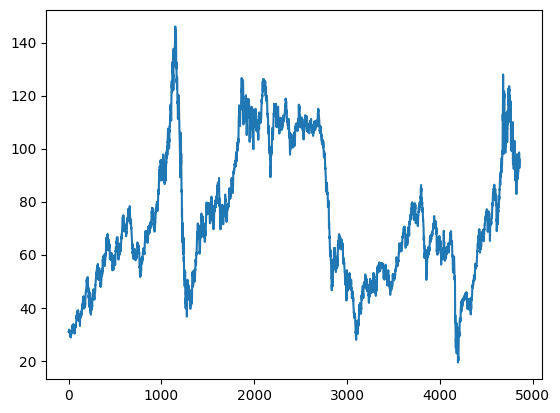

In [ ]:
data1=data.iloc[:,1:2].values
data1
plt.plot(data1)

In [ ]:
data_train = data1[0:np.int16(0.8*data1.shape[0])]
data_test = data1[np.int16(0.8*data1.shape[0]):]

In [ ]:
data_train.shape

(3888, 1)

In [ ]:
data_train.mean()
data_z = (data_train-data_train.mean())/(data_train.std())
data_z.mean()

-3.801257434107532e-16

In [ ]:
x_train = []
y_train = []

for i in range (5, len(data_z)):
  x_train.append(data_z[i-5:i,0])
  y_train.append(data_z[i,0])
  if i<=10:
    print(x_train)
    print(y_train)
    print()

[array([-1.68627764, -1.68893587, -1.69121436, -1.67906243, -1.66804974])]
[-1.6532395677002687]

[array([-1.68627764, -1.68893587, -1.69121436, -1.67906243, -1.66804974]), array([-1.68893587, -1.69121436, -1.67906243, -1.66804974, -1.65323957])]
[-1.6532395677002687, -1.6680497371471765]

[array([-1.68627764, -1.68893587, -1.69121436, -1.67906243, -1.66804974]), array([-1.68893587, -1.69121436, -1.67906243, -1.66804974, -1.65323957]), array([-1.69121436, -1.67906243, -1.66804974, -1.65323957, -1.66804974])]
[-1.6532395677002687, -1.6680497371471765, -1.680961166921404]

[array([-1.68627764, -1.68893587, -1.69121436, -1.67906243, -1.66804974]), array([-1.68893587, -1.69121436, -1.67906243, -1.66804974, -1.65323957]), array([-1.69121436, -1.67906243, -1.66804974, -1.65323957, -1.66804974]), array([-1.67906243, -1.66804974, -1.65323957, -1.66804974, -1.68096117])]
[-1.6532395677002687, -1.6680497371471765, -1.680961166921404, -1.6608345263909907]

[array([-1.68627764, -1.68893587, -1.691

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train

array([[[-1.68627764],
        [-1.68893587],
        [-1.69121436],
        [-1.67906243],
        [-1.66804974]],

       [[-1.68893587],
        [-1.69121436],
        [-1.67906243],
        [-1.66804974],
        [-1.65323957]],

       [[-1.69121436],
        [-1.67906243],
        [-1.66804974],
        [-1.65323957],
        [-1.66804974]],

       ...,

       [[-0.53070467],
        [-0.51817299],
        [-0.50905904],
        [-0.47640072],
        [-0.48551467]],

       [[-0.51817299],
        [-0.50905904],
        [-0.47640072],
        [-0.48551467],
        [-0.50564131]],

       [[-0.50905904],
        [-0.47640072],
        [-0.48551467],
        [-0.50564131],
        [-0.47867921]]])

Epoch 1/100
195/195 [==============================] - 7s 9ms/step - loss: 0.1328
Epoch 2/100
195/195 [==============================] - 1s 5ms/step - loss: 0.0592
Epoch 3/100
195/195 [==============================] - 1s 5ms/step - loss: 0.0564
Epoch 4/100
195/195 [==============================] - 1s 5ms/step - loss: 0.0545
Epoch 5/100
195/195 [==============================] - 1s 4ms/step - loss: 0.0496
Epoch 6/100
195/195 [==============================] - 1s 5ms/step - loss: 0.0496
Epoch 7/100
195/195 [==============================] - 1s 5ms/step - loss: 0.0461
Epoch 8/100
195/195 [==============================] - 1s 5ms/step - loss: 0.0453
Epoch 9/100
195/195 [==============================] - 1s 5ms/step - loss: 0.0438
Epoch 10/100
195/195 [==============================] - 1s 5ms/step - loss: 0.0443
Epoch 11/100
195/195 [==============================] - 1s 5ms/step - loss: 0.0443
Epoch 12/100
195/195 [==============================] - 1s 8ms/step - loss: 0.0446
Epoch 13/100


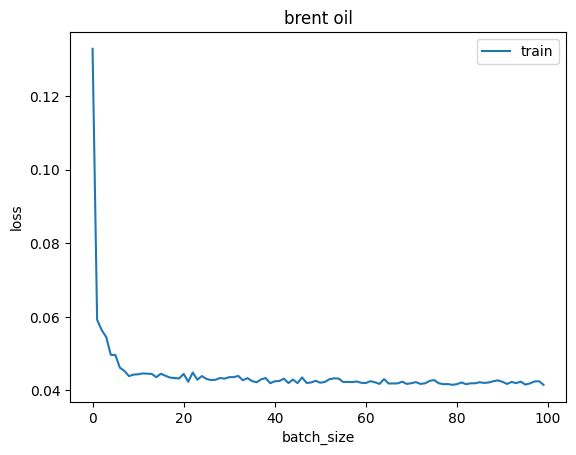

In [ ]:
from typing import Sequence
model = Sequential()
model.add(Conv1D(64, 1, activation='relu',  input_shape=(x_train.shape[1],news4.shape[1])))
model.add(Bidirectional(LSTM(64, activation='relu')))
model.add(Dense(1))
model.compile(loss='mean_absolute_error',optimizer='adam')
history=model.fit(x_train,y_train, epochs=100, batch_size=20)
plt.plot(history.history['loss'], label='train')
plt.title('brent oil')
plt.ylabel('loss')
plt.xlabel('batch_size')
plt.legend()
plt.show()

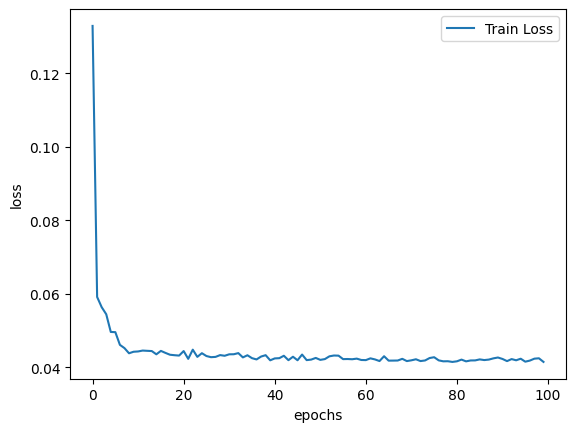

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

In [ ]:
data_z_test = (data_test-data_train.mean())/(data_train.std())

In [ ]:
x_test = []
y_test = []

for i in range (5, len(data_z_test)):
  x_test.append(data_z_test[i-5:i,0])
  y_test.append(data_z_test[i,0])
  if i<=10:
    print(x_test)
    print(y_test)
    print()

[array([-0.50108433, -0.52348946, -0.4889324 , -0.4437424 , -0.40728659])]
[-0.34348894148526554]

[array([-0.50108433, -0.52348946, -0.4889324 , -0.4437424 , -0.40728659]), array([-0.52348946, -0.4889324 , -0.4437424 , -0.40728659, -0.34348894])]
[-0.34348894148526554, -0.3339952431218631]

[array([-0.50108433, -0.52348946, -0.4889324 , -0.4437424 , -0.40728659]), array([-0.52348946, -0.4889324 , -0.4437424 , -0.40728659, -0.34348894]), array([-0.4889324 , -0.4437424 , -0.40728659, -0.34348894, -0.33399524])]
[-0.34348894148526554, -0.3339952431218631, -0.33589398279454347]

[array([-0.50108433, -0.52348946, -0.4889324 , -0.4437424 , -0.40728659]), array([-0.52348946, -0.4889324 , -0.4437424 , -0.40728659, -0.34348894]), array([-0.4889324 , -0.4437424 , -0.40728659, -0.34348894, -0.33399524]), array([-0.4437424 , -0.40728659, -0.34348894, -0.33399524, -0.33589398])]
[-0.34348894148526554, -0.3339952431218631, -0.33589398279454347, -0.31196986291876944]

[array([-0.50108433, -0.5234894

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
predictions = model.predict(x_test)

In [ ]:
predictions_r = ((predictions*(data_train.std()))+(data_train.mean()))

In [ ]:
mae = mean_absolute_error(data_test[5:],predictions_r)
mae

1.2952406246405987

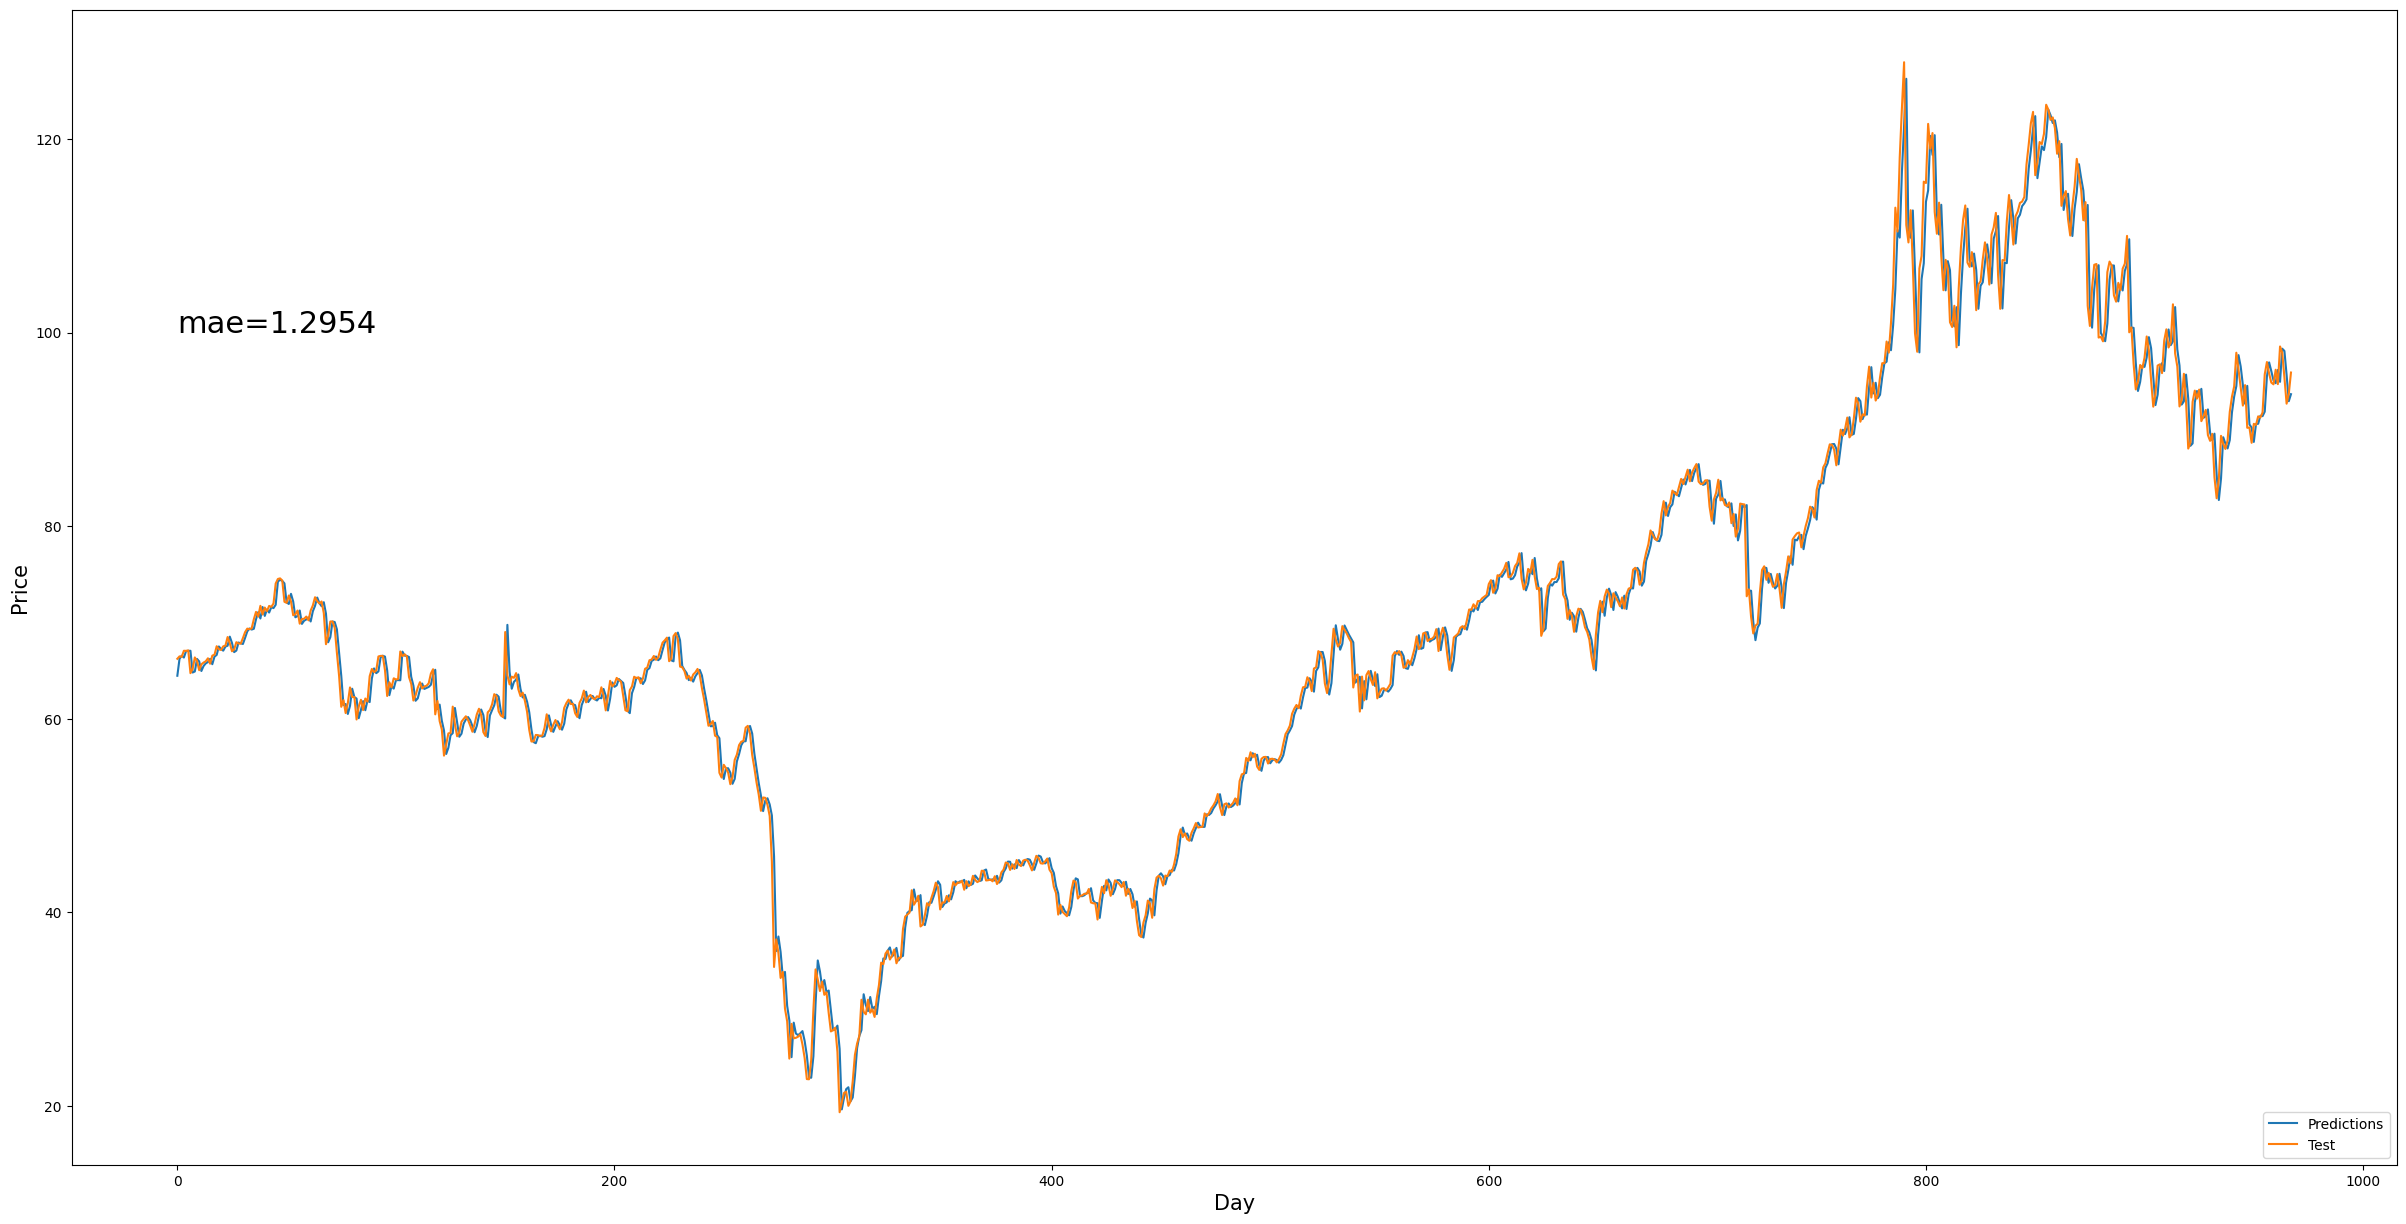

In [ ]:
plt.figure(figsize=(30,15))
plt.text(0,100,'mae=1.2954', fontsize=22)
plt.plot(predictions_r)
plt.plot(data_test[5:])
plt.legend(['Predictions','Test'], loc='lower right')
plt.ylabel('Price',fontsize = 15)
plt.xlabel('Day',fontsize = 15)
plt.show()